In [129]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn import datasets, preprocessing
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [130]:
#__IMPORTAMOS NUESTRO ARCHIVO CSV__Y LO CONVERTIMOS EN UN DATAFRAME__
df01=pd.read_csv(r"C:\Users\jesus\Documents\data scince\github\properatti.csv" ,delimiter=",")
pd.set_option('display.max_columns', None)
df01=df01.drop(["Unnamed: 0"], axis=1)

In [131]:
df01.head(5)

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,150000.0,USD,2646675.0,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,USD,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,95000.0,USD,1676227.5,95000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,64000.0,USD,1129248.0,64000.0,35.0,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...


In [132]:
# Borramos las columnas que no vamos a comparar con el otro proyecto
df=df01.drop(["property_type", "operation", "state_name", "geonames_id", "place_name", "country_name", "place_with_parent_names", "price", "lat-lon", "lat", "lon", "price_aprox_local_currency", "surface_total_in_m2", "price_per_m2", "currency", "image_thumbnail", "price_usd_per_m2", "description", "title", "properati_url", "expenses"], axis=1)

In [133]:
df

,price_aprox_usd,surface_covered_in_m2,floor,rooms
0,62000.0,40.0,NaN,NaN
1,150000.0,NaN,NaN,NaN
2,72000.0,55.0,NaN,NaN
3,95000.0,NaN,NaN,NaN
4,64000.0,35.0,NaN,NaN
...,...,...,...,...
121215,870000.0,93.0,NaN,NaN
121216,498000.0,360.0,NaN,NaN
121217,131500.0,39.0,NaN,NaN
121218,95900.0,48.0,NaN,NaN


In [134]:
#Eliminamos los nan para ver los datos que nos interesan
df = df.dropna(axis = 0)

In [135]:
df

,price_aprox_usd,surface_covered_in_m2,floor,rooms
89,50000.0,53.0,1.0,1.0
93,385000.0,416.0,2.0,3.0
94,135000.0,95.0,2.0,3.0
95,75000.0,180.0,1.0,1.0
96,54000.0,30.0,3.0,2.0
...,...,...,...,...
119929,75000.0,23.0,7.0,1.0
119930,170000.0,63.0,2.0,3.0
119935,95000.0,12731.0,1.0,10.0
119936,267000.0,82.0,1.0,4.0


In [136]:
# hacemos un reseset en los index
df = df.reset_index(drop=True)

In [137]:
df

,price_aprox_usd,surface_covered_in_m2,floor,rooms
0,50000.0,53.0,1.0,1.0
1,385000.0,416.0,2.0,3.0
2,135000.0,95.0,2.0,3.0
3,75000.0,180.0,1.0,1.0
4,54000.0,30.0,3.0,2.0
...,...,...,...,...
4505,75000.0,23.0,7.0,1.0
4506,170000.0,63.0,2.0,3.0
4507,95000.0,12731.0,1.0,10.0
4508,267000.0,82.0,1.0,4.0


In [138]:
# Hacemos un describe en el dataframe para ver localizar outlierts 
df.describe()

,price_aprox_usd,surface_covered_in_m2,floor,rooms
count,4.510000e+03,4510.000000,4510.000000,4510.000000
mean,2.281335e+05,110.444124,25.580931,2.662306
std,3.289798e+05,425.448592,148.305896,1.308373
min,5.047530e+03,5.000000,1.000000,1.000000
25%,8.580000e+04,42.000000,1.000000,2.000000
50%,1.300000e+05,60.000000,3.000000,3.000000
75%,2.174756e+05,100.000000,6.000000,3.000000
max,3.900000e+06,12731.000000,2509.000000,22.000000


In [139]:
# Calculamos el percentil del 98%
q = df["floor"].quantile(0.98)
print(q)

312.8199999999997


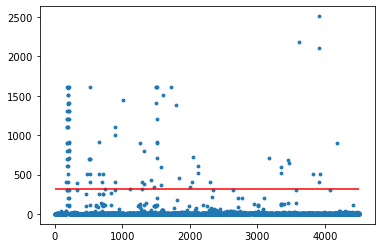

In [140]:
# Dibujamos el percentil del 98% en FLOOR
plt.scatter(df.index, df["floor"], s=8)
plt.hlines(y=q, xmin=0, xmax=4500, colors='red')
plt.show()

In [141]:
# Mostramos los pisos de floor umbral (threshold) que marca el percentil del 98%
q = df["floor"].quantile(0.98)
print(q)

# Eliminamos del dataframe los pisos que esten por encima del percentil del 98% (criterio de filtrado)
df = df[df["floor"] < q]

# hacemos un values_counts para visualizar los datos que hay en la columna FLOOR
df['floor'].value_counts()

312.8199999999997


1.0      1168
2.0       947
3.0       474
4.0       335
5.0       276
         ... 
44.0        1
45.0        1
181.0       1
56.0        1
26.0        1
Name: floor, Length: 100, dtype: int64

In [142]:
# vemos el describe del dataframe para ver los valores, si sigue valores atipicos o no
df.describe()

,price_aprox_usd,surface_covered_in_m2,floor,rooms
count,4.419000e+03,4419.000000,4419.000000,4419.000000
mean,2.284929e+05,110.718941,6.970582,2.650600
std,3.317226e+05,429.640146,22.631829,1.306609
min,5.047530e+03,5.000000,1.000000,1.000000
25%,8.500000e+04,42.000000,1.000000,2.000000
50%,1.300000e+05,60.000000,3.000000,3.000000
75%,2.160675e+05,100.000000,6.000000,3.000000
max,3.900000e+06,12731.000000,312.000000,22.000000


In [143]:
# Calculamos el percentil del 99% de la columan PRECIO
q = df["price_aprox_usd"].quantile(0.99)
print(q)

1857399.9999999795


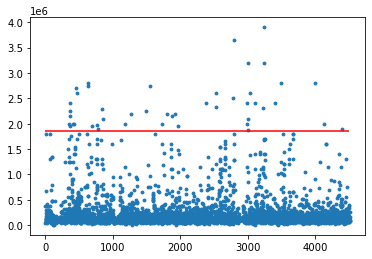

In [144]:
# Dibujamos el percentil del 99% en el precio
plt.scatter(df.index, df["price_aprox_usd"], s=8)
plt.hlines(y=q, xmin=0, xmax=4500, colors='red')
plt.show()

# vemos que no hay datos atipicos superiores

In [145]:
# Calculamos el percentil del 1% de la columan PRECIO
q = df["price_aprox_usd"].quantile(0.01)
print(q)

39000.0


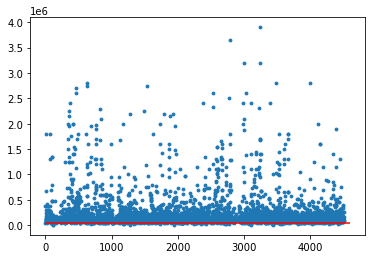

In [146]:
# Dibujamos el percentil del 1% en Precios
plt.scatter(df.index, df["price_aprox_usd"], s=8)
plt.hlines(y=q, xmin=0, xmax=4600, colors='red')
plt.show()

In [147]:
# Mostramos los precios umbral (threshold) que marca el percentil del 1%
q = df["price_aprox_usd"].quantile(0.01)
print(q)

# Eliminamos del dataframe los pisos que esten por debajo del percentil del 1% (criterio de filtrado)
df = df[df["price_aprox_usd"] > q]

# hacemos un values_counts para visualizar los datos que hay en la columna price
df['price_aprox_usd'].value_counts()

39000.0


75000.00      71
85000.00      71
130000.00     69
120000.00     68
125000.00     65
              ..
1182800.00     1
83530.52       1
115900.00      1
115600.00      1
299999.00      1
Name: price_aprox_usd, Length: 940, dtype: int64

In [148]:
# hacemos un describe y vemos que el min de la columna price cambio
# osea eliminamos el outliers minimo que habian
df.describe()

,price_aprox_usd,surface_covered_in_m2,floor,rooms
count,4.373000e+03,4373.000000,4373.000000,4373.000000
mean,2.305941e+05,109.566202,6.985136,2.653327
std,3.328251e+05,414.027204,22.728891,1.304896
min,3.914640e+04,5.000000,1.000000,1.000000
25%,8.690000e+04,42.000000,1.000000,2.000000
50%,1.300000e+05,60.000000,3.000000,3.000000
75%,2.190000e+05,100.000000,6.000000,3.000000
max,3.900000e+06,12731.000000,312.000000,22.000000


In [156]:
# Calculamos el percentil del 99% de la columan rooms
q = df["rooms"].quantile(0.99)
print(q)

6.0


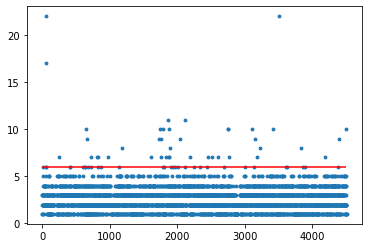

In [150]:
# Dibujamos el percentil del 99% en el precio
plt.scatter(df.index, df["rooms"], s=8)
plt.hlines(y=q, xmin=0, xmax=4500, colors='red')
plt.show()

In [151]:
# visualizamos los datos a tipicos, si tienen o no coherencia
# Position of the Outlier
print(np.where((df['rooms'] > 7 )))

(array([  58,   59,  594,  612, 1119, 1644, 1665, 1676, 1708, 1782, 1786,
       1802, 1946, 2020, 2650, 2653, 3004, 3050, 3109, 3307, 3395, 3710,
       4257, 4370], dtype=int64),)


In [153]:
df.loc[58]

price_aprox_usd          250000.0
surface_covered_in_m2       382.0
floor                         1.0
rooms                        17.0
Name: 58, dtype: float64

In [154]:
df['rooms'].value_counts()

2.0     1426
3.0     1325
1.0      717
4.0      670
5.0      163
6.0       31
7.0       17
10.0       9
9.0        6
8.0        4
22.0       2
11.0       2
17.0       1
Name: rooms, dtype: int64

In [127]:
# Mostramos las habitaciones umbral (threshold) que marca el percentil del 99%
q = df["rooms"].quantile(0.99)
print(q)

# Eliminamos del dataframe las habitaciones que esten por encima del percentil del 99% (criterio de filtrado)
df = df[df["rooms"] < q]

# hacemos un values_counts para visualizar los datos que hay en la columna rooms
df['rooms'].value_counts()

22.0


7.0     15
10.0     9
9.0      6
8.0      4
11.0     2
17.0     1
Name: rooms, dtype: int64

In [128]:
df.describe()

,price_aprox_usd,surface_covered_in_m2,floor,rooms
count,3.700000e+01,37.000000,37.000000,37.000000
mean,5.169769e+05,636.621622,5.945946,8.648649
std,3.838118e+05,2048.789458,7.999812,1.975070
min,9.500000e+04,20.000000,1.000000,7.000000
25%,2.590000e+05,200.000000,1.000000,7.000000
50%,4.190000e+05,274.000000,3.000000,8.000000
75%,6.700000e+05,400.000000,8.000000,10.000000
max,1.990000e+06,12731.000000,42.000000,17.000000


In [100]:
# Position of the Outlier
print(np.where((df['price_aprox_usd'] < 15000)))

(array([ 119,  121, 1195, 1811, 2944, 3279], dtype=int64),)


In [102]:
df.loc[3279]

price_aprox_usd          82000.0
surface_covered_in_m2       34.0
floor                       11.0
rooms                        1.0
Name: 3279, dtype: float64

In [92]:
df.head(20)

,price_aprox_usd,surface_covered_in_m2,floor,rooms
0,50000.0,53.0,1.0,1.0
1,385000.0,416.0,2.0,3.0
2,135000.0,95.0,2.0,3.0
3,75000.0,180.0,1.0,1.0
4,54000.0,30.0,3.0,2.0
5,249000.0,126.0,1.0,6.0
6,185000.0,100.0,1.0,3.0
7,380000.0,91.0,2.0,3.0
8,128000.0,51.0,6.0,2.0
9,110000.0,150.0,1.0,3.0
